In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

C:\Users\Appzone-MLG\Anaconda3\envs\chest_xray_env\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [3]:
# Reading the csv file 
# Here we will be using a subset of the original dataset

train = pd.read_csv('CheXpert-v1.0-small/train_data.csv', nrows=3000)

In [5]:
train.head()

,path,no_finding,enlarged_cardiomediastinum,cardiomegaly,lung_opacity,lung_lesion,edema,consolidation,pneumonia,atelectasis,pneumothorax,pleural_effusion,pleural_other,fracture,support_devices,no_of_labels
0,CheXpert-v1.0-small/train/patient00001/study1/...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
3,CheXpert-v1.0-small/train/patient00002/study1/...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# load validaation set
validation = pd.read_csv('CheXpert-v1.0-small/valid.csv')

In [5]:
# Columns of interest
train.columns

Index(['path', 'no_finding', 'enlarged_cardiomediastinum', 'cardiomegaly',
       'lung_opacity', 'lung_lesion', 'edema', 'consolidation', 'pneumonia',
       'atelectasis', 'pneumothorax', 'pleural_effusion', 'pleural_other',
       'fracture', 'no_of_labels'],
      dtype='object')

In [6]:
# Install Pillow and restart the Jupyter Server

# import sys
# import PIL
# from PIL import Image
# sys.modules['Image'] = Image 

# from IPython.display import display
# from PIL import Image

In [7]:
# loading and preprocessing 
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img(''+train['path'][i]+'',target_size=(400,400,1))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:29<00:00, 168.60it/s]


In [8]:
X.shape

(5000, 400, 400, 3)

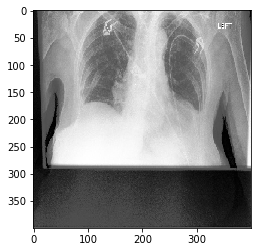

In [9]:
plt.imshow(X[2])

In [10]:
# loading the Multi-calssification binary classification label

y = np.array(train.drop(['path', 'no_of_labels'],axis=1))
y.shape

(5000, 13)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)

In [12]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(13, activation='sigmoid'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
# print our model summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 396, 396, 16)      816       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 93, 93, 64)        51264     
__________

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
# Model Training
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

ValueError: Error when checking input: expected conv2d_1_input to have shape (400, 400, 2) but got array with shape (400, 400, 3)

In [ ]:
validation_set = pd.read_csv('CheXpert-v1.0-small/valid.csv')


In [ ]:
validation_set.head()

In [ ]:
# 'CheXpert-v1.0-small/valid/patient64541/study1/view1_frontal.jpg' image location

img = image.load_img(''+validation_set['Path'][20]+'' , target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

In [ ]:
classes = np.array(validation_set.columns[5:18])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [ ]:
model.predict(img.reshape(1,400,400,3))